# Exercício

- Classifique cada coluna do dataset a seguir como nominal, ordinal, binária, discreta ou contínua, com base apenas na descrição do dicionário de dados
- Com auxílio do método de dataframes `describe`, confirme sua classificação anterior
- Remova colunas com valor constante
- Crie as seguintes listas Python com os nomes das colunas que encaixam na descrição sugerida pelo nome da lista
  - `colunas_categoricas_nao_ordenadas`
  - `colunas_categoricas_ordenadas`
  - `coluna_alvo`
  - `colunas_numericas`
- Com as listas criadas, transforme as colunas categóricas do dataframe em tipo `category`, tomando cuidado de considerar se são ordenadas ou não. Ou seja, as categóricas ordenadas devem ser criadas considerando a ordem natural de seus elementos.
- Crie uma única figura com os histogramas de todas as colunas numéricas

## O dataset

O dataset a ser utilizado é o *IBM HR Analytics Employee Attrition & Performance*, disponível no Kaggle. O dataset contém informações sobre funcionários de uma empresa fictícia, como idade, gênero, estado civil, nível de satisfação, entre outros. O objetivo é prever a probabilidade de um funcionário sair da empresa.

[Link do Kaggle](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data)

Os termos *attrition* ("atrito") e *turnover* ("rotatividade") são frequentemente usados de forma intercambiável no contexto de recursos humanos e gestão de força de trabalho, mas eles se referem a conceitos ligeiramente diferentes em relação às mudanças no número e na composição dos empregados dentro de uma organização. Compreender a distinção entre esses dois é importante para analisar e relatar com precisão a dinâmica da força de trabalho.

### Atrito

Atrito refere-se à redução gradual de empregados por meio de circunstâncias naturais, como aposentadoria, demissão voluntária por motivos pessoais, ou a decisão de não substituir empregados que estão de saída. Atrito pode levar a uma diminuição no tamanho da força de trabalho, mas é caracterizado por sua natureza voluntária e muitas vezes incontrolável. Organizações podem permitir o atrito para reduzir o tamanho de sua força de trabalho sem recorrer a demissões, vendo isso como uma forma menos disruptiva de ajustar seus níveis de pessoal.

Em análises, quando você está analisando um conjunto de dados para atrito, você frequentemente olha para as razões por trás das saídas voluntárias e a taxa na qual estas ocorrem naturalmente ao longo do tempo. Taxas de atrito podem fornecer insights sobre a satisfação dos empregados e tendências de longo prazo da força de trabalho.

### Rotatividade

Rotatividade, por outro lado, engloba um escopo mais amplo de partidas de empregados, incluindo tanto renúncias voluntárias quanto demissões involuntárias (como demissões ou términos por justa causa). Porém, ocorre a substituição da força de trabalho. Rotatividade é uma medida de quantos empregados estão deixando a companhia por qualquer motivo. Uma alta taxa de rotatividade pode indicar problemas com satisfação no trabalho, cultura do local de trabalho, ou estabilidade organizacional, e frequentemente requer ação da gestão para endereçar as causas subjacentes.

Rotatividade é calculada dividindo o número de empregados que saem pelo número médio de empregados, geralmente em uma base anual, e expressando isso como uma porcentagem. Esta métrica é crucial para entender como as saídas de empregados, tanto voluntárias quanto involuntárias, afetam a capacidade da organização de manter uma força de trabalho estável e eficaz.

### Diferenças Chave

- **Natureza**: Atrito geralmente é voluntário e pode ser devido a fatores naturais ou incontroláveis, enquanto rotatividade inclui tanto saídas voluntárias quanto demissões involuntárias.
- **Implicações para Gestão**: Atrito pode ser parte de uma estratégia de ajuste natural da força de trabalho e nem sempre é negativo, enquanto alta rotatividade é frequentemente um sinal de problemas dentro da organização que precisam ser abordados.
- **Foco Estratégico**: Análise de atrito pode focar em entender tendências de longo prazo da força de trabalho e planejamento de aposentadoria, enquanto análise de rotatividade é frequentemente usada para identificar questões imediatas com satisfação de empregados, engajamento, ou práticas de gestão que podem estar impactando a retenção de staff.

Enquanto ambos atrito e rotatividade lidam com empregados deixando a organização, eles diferem em seu escopo e as implicações estratégicas para gerenciar e entender a dinâmica da força de trabalho. No seu conjunto de dados de empregados, distinguir entre atrito e rotatividade pode ajudar na customização de estratégias para planejamento da força de trabalho, retenção e desenvolvimento organizacional.

In [1]:
import pandas as pd

DADOS = "dados/employee_attrition.csv"

df = pd.read_csv(DADOS)

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
with pd.option_context('display.max_columns',35):
    display(df.head())

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [3]:
with pd.option_context('display.max_columns',35):
    display(df.describe())

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
with pd.option_context('display.max_columns',35):
    display(df.describe(exclude='number'))

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [6]:
df=df.drop(columns=['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [11]:
colunas_categoricas_nao_ordenada=[
    "BusinessTravel",
    "Department",
    "EducationField",
    "Gender",
    "JobRole",
    "MaritalStatus",
    "OverTime"
]

colunas_categoricas_ordenadas=[
    "Education",
    "EnvironmentSatisfaction",
    "JobSatisfaction",
    "JobInvolvement",
    "JobLevel",
    "PerformanceRating",
    "RelationshipSatisfaction",
    "StockOptionLevel",
    "WorkLifeBalance",

]

coluna_alvo=["Attrition"]

coluna_numericas =[

    coluna for coluna in df.columns if coluna not in(colunas_categoricas_nao_ordenada + 
                                                     colunas_categoricas_ordenadas + coluna_alvo)

]

In [12]:
coluna_numericas

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [14]:
for coluna in (colunas_categoricas_nao_ordenada+colunas_categoricas_ordenadas):
    print(f'{coluna}:{df[coluna].unique()}')

BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department:['Sales' 'Research & Development' 'Human Resources']
EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender:['Female' 'Male']
JobRole:['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus:['Single' 'Married' 'Divorced']
OverTime:['Yes' 'No']
Education:[2 1 4 3 5]
EnvironmentSatisfaction:[2 3 4 1]
JobSatisfaction:[4 2 3 1]
JobInvolvement:[3 2 4 1]
JobLevel:[2 1 3 4 5]
PerformanceRating:[3 4]
RelationshipSatisfaction:[1 4 2 3]
StockOptionLevel:[0 1 3 2]
WorkLifeBalance:[1 3 2 4]


In [16]:
for coluna in (colunas_categoricas_nao_ordenada):
    df[coluna]=df[coluna].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   object  
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   category
 8   EnvironmentSatisfaction   1470 non-null   int64   
 9   Gender                    1470 non-null   category
 10  HourlyRate                1470 non-null   int64   
 11  JobInvolvement            1470 non-null   int64   
 12  JobLevel                  1470 non-null   int64   
 13  JobRole                   1470 non-null   catego

In [20]:
sorted(df["Education"].unique())

[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]

In [21]:
for coluna in (colunas_categoricas_ordenadas):
    df[coluna]=df[coluna].astype("category")

    categorias_ordenadas = sorted(df[coluna].unique())

    df[coluna]=df[coluna].cat.set_categories(categorias_ordenadas,ordered=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   object  
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   category
 7   EducationField            1470 non-null   category
 8   EnvironmentSatisfaction   1470 non-null   category
 9   Gender                    1470 non-null   category
 10  HourlyRate                1470 non-null   int64   
 11  JobInvolvement            1470 non-null   category
 12  JobLevel                  1470 non-null   category
 13  JobRole                   1470 non-null   catego

In [23]:
for coluna in (colunas_categoricas_nao_ordenada+colunas_categoricas_ordenadas):
    print(f'{coluna}:{df[coluna].unique()}')
    print()

BusinessTravel:['Travel_Rarely', 'Travel_Frequently', 'Non-Travel']
Categories (3, object): ['Non-Travel', 'Travel_Frequently', 'Travel_Rarely']

Department:['Sales', 'Research & Development', 'Human Resources']
Categories (3, object): ['Human Resources', 'Research & Development', 'Sales']

EducationField:['Life Sciences', 'Other', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources']
Categories (6, object): ['Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other', 'Technical Degree']

Gender:['Female', 'Male']
Categories (2, object): ['Female', 'Male']

JobRole:['Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Sales Representative', 'Research Director', 'Human Resources']
Categories (9, object): ['Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', ..., 'Research Director', 'Research Scientist', 'Sales Executive', 'Sales Representative']

MaritalStatu

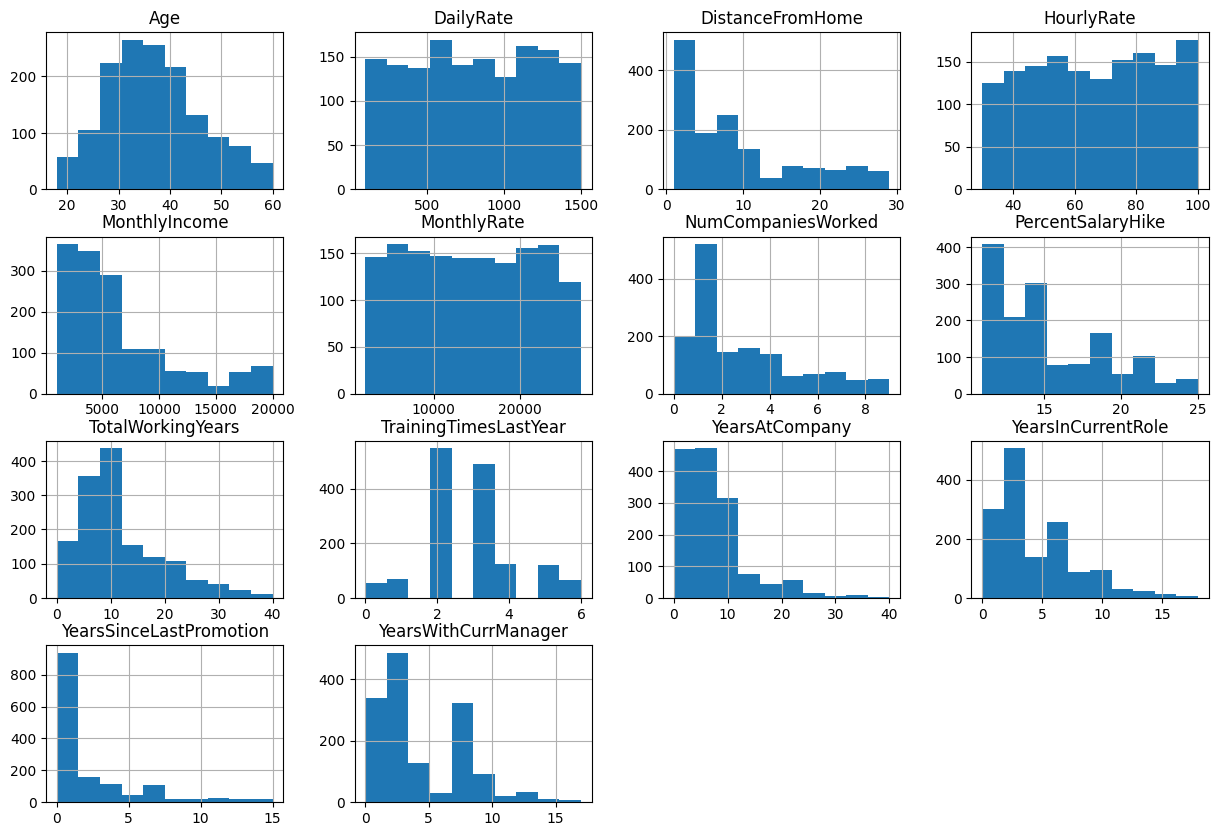

In [24]:
df[coluna_numericas].hist(figsize=(15,10));